# **Trabalho NLP**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

# **1. Imports | Load dataset | Código exploratório**

In [ ]:
# para correr o gensim usado no Word2Vec é necessario executar isto 1 vez e depois reiniciar sessão e não executar mais
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
import pandas as pd
from google.colab import files
from tabulate import tabulate
import io

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.util import ngrams
from nltk.metrics.distance import jaccard_distance
from nltk.metrics import jaccard_distance
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import gensim
from gensim.models import Word2Vec

from collections import Counter
import string
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI
import multiprocessing as mp
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']),sep=',')

Saving Tweets.csv to Tweets.csv


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Presença de duplicados
print(f"There are {df.duplicated().sum()} duplicate records in the datset.")
print("\n")

# Presença de valores nulos (NaN)
print(df.isna().sum())

There are 36 duplicate records in the datset.


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [ ]:
print((df == 'US Airways').sum())

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                     0
negativereason_confidence          0
airline                         2913
airline_sentiment_gold             0
name                               0
negativereason_gold                0
retweet_count                      0
text                               0
tweet_coord                        0
tweet_created                      0
tweet_location                     0
user_timezone                      0
dtype: int64


In [ ]:
df_us_air = df[df['airline'] == 'US Airways']
df_us_air.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8966,570310600460525568,negative,0.6292,Flight Booking Problems,0.3146,US Airways,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2015-02-24 11:53:37 -0800,NaN,NaN
8967,570310144459972608,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2015-02-24 11:51:48 -0800,NaN,Atlantic Time (Canada)
8968,570309340952993796,neutral,1.0000,NaN,NaN,US Airways,NaN,DebbiMcGinnis,NaN,0,@USAirways is a DM possible if you aren't foll...,NaN,2015-02-24 11:48:37 -0800,Missourah,Hawaii
8969,570309000279023616,neutral,1.0000,NaN,NaN,US Airways,NaN,AshleyKAtherton,NaN,0,@USAirways Fortunately you have staff like Lyn...,NaN,2015-02-24 11:47:16 -0800,NaN,Central Time (US & Canada)
8970,570308799950692353,negative,1.0000,Customer Service Issue,0.6452,US Airways,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2015-02-24 11:46:28 -0800,NaN,NaN


In [ ]:
df_us_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 8966 to 11878
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2913 non-null   int64  
 1   airline_sentiment             2913 non-null   object 
 2   airline_sentiment_confidence  2913 non-null   float64
 3   negativereason                2263 non-null   object 
 4   negativereason_confidence     2470 non-null   float64
 5   airline                       2913 non-null   object 
 6   airline_sentiment_gold        3 non-null      object 
 7   name                          2913 non-null   object 
 8   negativereason_gold           2 non-null      object 
 9   retweet_count                 2913 non-null   int64  
 10  text                          2913 non-null   object 
 11  tweet_coord                   150 non-null    object 
 12  tweet_created                 2913 non-null   object 
 13  twee

In [ ]:
# Substituição da etiquena nan por valores nulos
df_us_air.replace('nan', np.nan, inplace=True)

# Presença de valores nulos na 'airline' = 'US Airways'
print(df_us_air.isna().sum())

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                   650
negativereason_confidence        443
airline                            0
airline_sentiment_gold          2910
name                               0
negativereason_gold             2911
retweet_count                      0
text                               0
tweet_coord                     2763
tweet_created                      0
tweet_location                  1069
user_timezone                   1062
dtype: int64


<ipython-input-14-510d77bada2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_air.replace('nan', np.nan, inplace=True)


Matriz de Cramer's V:
                       airline_sentiment negativereason   airline  \
airline_sentiment                    1.0            0.0   0.19768   
negativereason                       0.0            1.0  0.101857   
airline                          0.19768       0.101857       1.0   
airline_sentiment_gold               1.0            0.0   0.15056   
name                            0.414722       0.318571   0.66474   
negativereason_gold                  0.0        0.78071       0.0   
text                            0.100534       0.073245  0.120645   
tweet_coord                          0.0       0.191299       0.0   
tweet_created                   0.096745       0.077935  0.107027   
tweet_location                  0.356714       0.268525  0.536917   
user_timezone                   0.128639       0.082211  0.196442   

                       airline_sentiment_gold      name negativereason_gold  \
airline_sentiment                         1.0  0.414722               

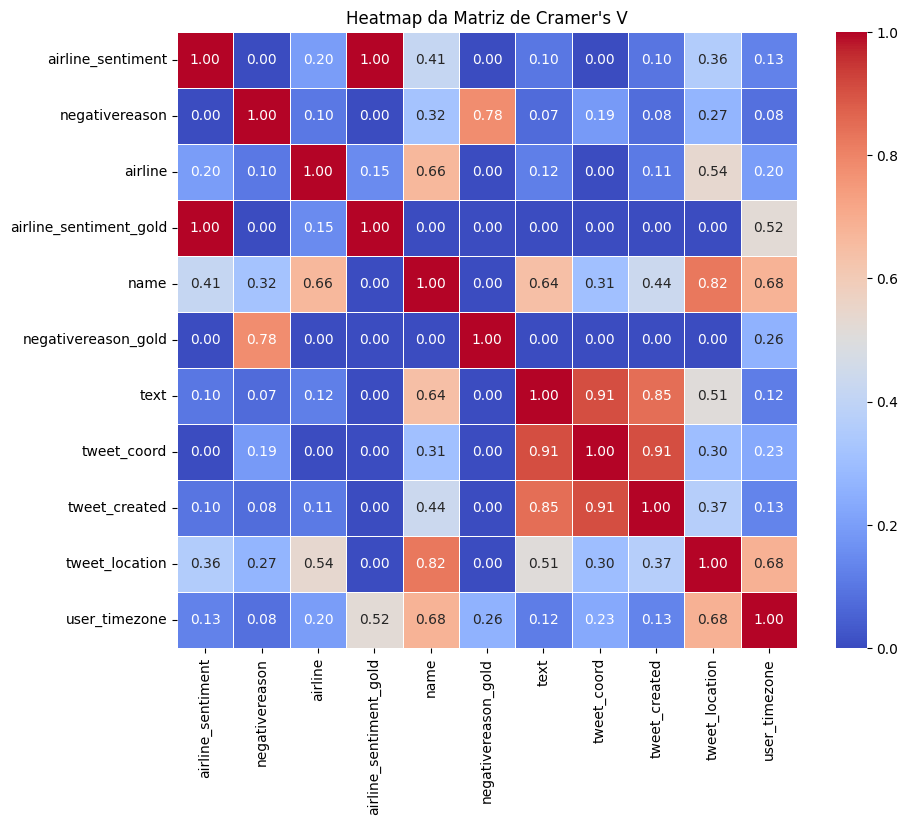

In [ ]:
# Técnica Cramer´s V

categorical_cols = ['airline_sentiment', 'negativereason',	'airline',	'airline_sentiment_gold',	'name',	'negativereason_gold',	'text',	'tweet_coord',	'tweet_created',	'tweet_location',	'user_timezone']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / (min((kcorr-1), (rcorr-1)) + 1e-8))

results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        results.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Matriz de Cramer's V:")
print(results)

results = results.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap da Matriz de Cramer's V")
plt.show()


*Analisando os resultados da Técnica Cramer´s V, nenhuma variável, além da que é semelhante (airline_sentiment_gold), se destaca com uma relação forte com o "airline_sentiment".*

# **2. Tratamento dos dados / Data Cleaning**

In [ ]:
df1 = df.copy()

In [ ]:
# Eliminação dos duplicados

df1.drop_duplicates(inplace = True)
print(f"Existem {df1.duplicated().sum()} duplicados no dataset.")
df1.shape

Existem 0 duplicados no dataset.


(14604, 15)

In [ ]:
# Como o valor nulo em negativereason indica que o tweet é positivo ou neutro,
# pode-se preencher com algo tipo "No Issue" ou "Positive/Neutral" para manter a consistência:

df1['negativereason'] = df['negativereason'].fillna('Positivo/Neutro')

In [ ]:
# Como airline_sentiment é a variável alvo (negative, neutral, positive)
# precisa ser categorizada para que o modelo entenda como um problema de classificação.

encoder = LabelEncoder()

df1['airline_sentiment'] = encoder.fit_transform(df1['airline_sentiment'])


In [ ]:
# Normalizing text -> letras em minúsculas

df1['text'] = df1['text'].str.lower()
comparison = pd.concat([df['text'].head().rename("Antes (df)"), df1['text'].head().rename("Depois (df1)")], axis=1)

print(comparison)

                                          Antes (df)  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        Depois (df1)  
0                @virginamerica what @dhepburn said.  
1  @virginamerica plus you've added commercials t...  
2  @virginamerica i didn't today... must mean i n...  
3  @virginamerica it's really aggressive to blast...  
4  @virginamerica and it's a really big bad thing...  


In [ ]:
# Data cleaning (cont.) -> retirar pontuação

df1['text'] = df1['text'].apply(lambda x: ''.join([w for w in x if w not in string.punctuation]))
df1[['airline_sentiment', 'text']].head(10)

,airline_sentiment,text
0,1,virginamerica what dhepburn said
1,2,virginamerica plus youve added commercials to ...
2,1,virginamerica i didnt today must mean i need t...
3,0,virginamerica its really aggressive to blast o...
4,0,virginamerica and its a really big bad thing a...
5,0,virginamerica seriously would pay 30 a flight ...
6,2,virginamerica yes nearly every time i fly vx t...
7,1,virginamerica really missed a prime opportunit...
8,2,virginamerica well i didnt…but now i do d
9,2,virginamerica it was amazing and arrived an ho...


In [ ]:
# Deteção de emojis (def)

def contains_emoji(text):
    return any(char in UNICODE_EMOJI for char in text)

emoji_in_columns = df1.apply(lambda col: col.astype(str).apply(contains_emoji).any() if col.dtype == 'object' else False)

emoji_in_columns_summary = emoji_in_columns.any()

print(f"Há emojis no dataframe: {emoji_in_columns_summary}")

if emoji_in_columns_summary:
    columns_with_emojis = emoji_in_columns[emoji_in_columns].index.tolist()
    print(f"Colunas com emojis: {columns_with_emojis}")
else:
    print("Não há emojis no dataframe.")


Há emojis no dataframe: True
Colunas com emojis: ['text', 'tweet_location']


In [ ]:
# Data cleaning (cont.) -> substituição de emojis pela sua descrição

def replace_emojis(text):
    return ''.join([UNICODE_EMOJI.get(char, char) for char in text])

df1['text'] = df1['text'].astype(str).apply(replace_emojis)
df1['tweet_location'] = df1['tweet_location'].astype(str).apply(replace_emojis)

In [ ]:
# Retirar stopwords, model verbs e outros (def)

def is_to_remove(word: str) -> bool:
     if word.lower() in stopwords.words('english'):
        return True
     if len(word) == 1:
        return ""
     if word in ['would', 'can', 'could', 'may', 'might', 'must', 'will']:
        return True
     if word in ["''", "´´", "``", "--", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "@usairways","..."]:
        return True
     return False
     for word in string.punctuation:
        if word not in ("'"):
            word = word.replace(char, "")
     return False



def remove_text(text:str) -> str:
    text_list = text.split()
    res = []
    for w in text_list:
        if not is_to_remove(w):
            res.append(w)
    return " ".join(res)


In [ ]:
# Data cleaning (cont.) -> retirar stopwords, model verbs e outros

df_comp_text = df1.copy()

df1['text'] = df1['text'].apply(remove_text)
comparison1 = pd.concat([df_comp_text['text'].head().rename("Antes (df_comp_text)"), df1['text'].head().rename("Depois (df1)")], axis=1)

print(comparison1)

                                Antes (df_comp_text)  \
0                   virginamerica what dhepburn said   
1  virginamerica plus youve added commercials to ...   
2  virginamerica i didnt today must mean i need t...   
3  virginamerica its really aggressive to blast o...   
4  virginamerica and its a really big bad thing a...   

                                        Depois (df1)  
0                        virginamerica dhepburn said  
1  virginamerica plus youve added commercials exp...  
2  virginamerica didnt today mean need take anoth...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


**Tratamento de Nan**

*Para o problema em questão, após análise, iremos considerar para o modelo as seguintes variáveis:*

*- variável target: "airline_sentiment";*

*- variáveis de input: "text"*

*Considerando que estas 2 variáveis não apresentam nan, não é necessário o tratamento de nan*

In [ ]:
# Avançar apenas com a informação relativa à  >>>  US Airways  <<<<

df1_us_air = df1.copy()
df1_us_air = df1_us_air[df1_us_air['airline'] == 'US Airways']
df1_us_air.shape

(2913, 15)

In [ ]:
# Correct spelling

correct_words = set(word.lower() for word in words.words())

correction_cache = {}

def correct_word(word):
    if word in correction_cache:
        return correction_cache[word]

    if word in correct_words or len(word) < 2:
        correction_cache[word] = word
        return word

    word_ngrams = set(ngrams(word, 2))
    closest_word = min(correct_words, key=lambda w: jaccard_distance(word_ngrams, set(ngrams(w, 2))))

    correction_cache[word] = closest_word
    return closest_word

def fix_text(text: str) -> str:
    return " ".join(correct_word(w) for w in text.split())

with mp.Pool(mp.cpu_count()) as pool:
    df1_us_air["text"] = pool.map(fix_text, df1_us_air["text"])


In [ ]:
# TESTE
fix_text("beautifulll  rftg")

'beautifully koftgar'

In [ ]:
# TESTE_CS (Cross Validation)

df_teste_cs = pd.DataFrame({
    "id": [1,2,3,4],
    "text": ["the car is beautifull", "tony amanha keyboaru", "si computerr", "trtrtr" ]
})

df_teste_cs["text_fixed"] = df_teste_cs["text"].apply(fix_text)
df_teste_cs

,id,text,text_fixed
0,1,the car is beautifull,the car is beautifully
1,2,tony amanha keyboaru,tony maranham keyboard
2,3,si computerr,si computer
3,4,trtrtr,ortrud


In [ ]:
# Aplicação do fix_text -> armazenar em df_download dado o elevado tempo de execução da célula (não é necessário executar mais que uma vez)

df_download = df1_us_air.copy()
df_download["text"] = df_download["text"].apply(fix_text)

In [ ]:
# Confirmar a eficácia de fix_text e correct_word

comparison1 = pd.concat([df1_us_air['text'].head().rename("Antes (df1_us_air)"), df_download['text'].head().rename("Depois (df_download)")], axis=1)
print(comparison1)

                                            Antes (df3)  \
8966  usairways better time call flight friday need ...   
8967               usairways one agents available speak   
8968              usairways dm possible arent following   
8969  usairways fortunately staff like lynn deedee a...   
8970  usairways hung another waste hour time suppose...   

                                           Depois (df4)  
8966  airway better time call flight friday need cha...  
8967                   airway one agent available speak  
8968               airway admi possible arent following  
8969  airway fortunately staff like lynn deedeed act...  
8970  airway hung another waste hour time supposed b...  


In [ ]:
                                                      # CONCLUÍDO O DATA CLEANING #
# Guardar dataset cleaned - df_download - só para a US Airways
df_download.to_csv('df_clean.csv', index=False)

# **3. Tasks do projeto**

In [ ]:
uploaded = files.upload()
df_us_air = pd.read_csv(io.BytesIO(uploaded["df_clean.csv"]), sep= ",")

Saving df_clean.csv to df_clean.csv


# **3.1) TASK 01**

## **1ª Questão:** *How is our company's twitter popularity in relation to our direct competitors?*


In [ ]:
# Total e percentagem de tweets por companhia

contagem_por_companhia = df1['airline'].value_counts()
percentagem_por_companhia = df1['airline'].value_counts(normalize=True) * 100

resultado = pd.DataFrame({
    'Contagem de tweets': contagem_por_companhia,
    'Percentagem': percentagem_por_companhia.round(1)
})


resultado

,Contagem de tweets,Percentagem
airline,,
United,3822,26.2
US Airways,2913,19.9
American,2723,18.6
Southwest,2420,16.6
Delta,2222,15.2
Virgin America,504,3.5


<ipython-input-28-e6521f9941c8>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(contagem_por_companhia))


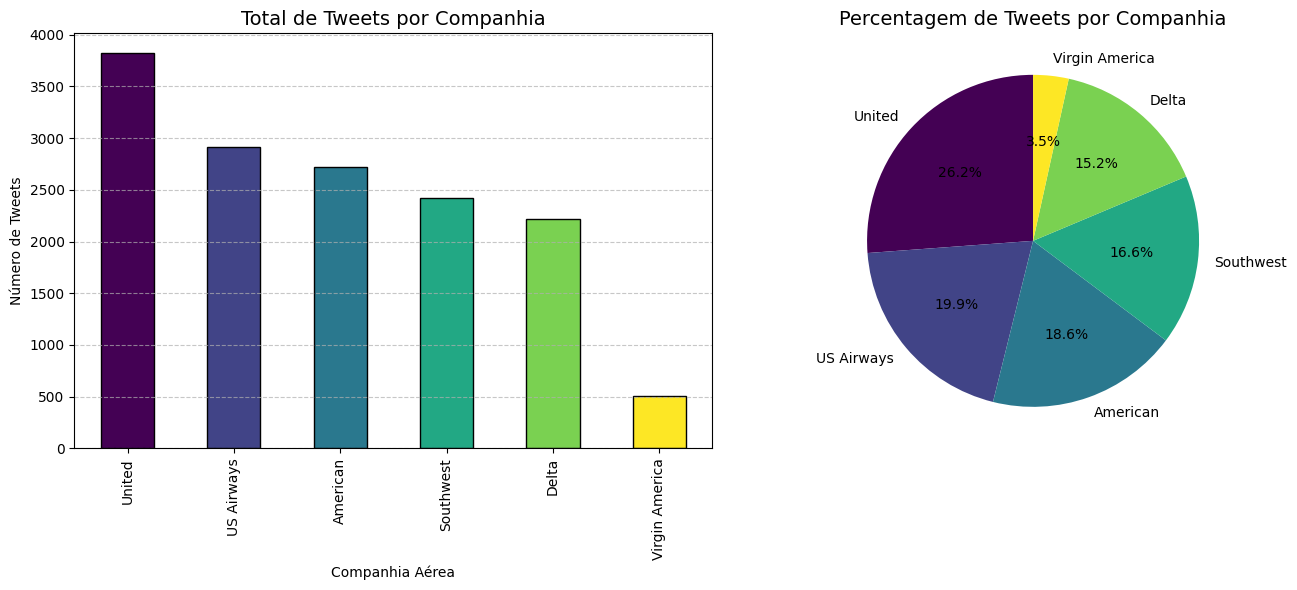

In [ ]:
cmap = plt.cm.get_cmap('viridis', len(contagem_por_companhia))
cores = [cmap(i) for i in range(len(contagem_por_companhia))]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Gráfico do total de tweets por companhia
contagem_por_companhia.plot(
    kind='bar',
    ax=axes[0],
    color=cores,
    edgecolor='black'
)
axes[0].set_title('Total de Tweets por Companhia', fontsize=14)
axes[0].set_xlabel('Companhia Aérea')
axes[0].set_ylabel('Número de Tweets')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)



# Gráfico de percentagem de tweets por companhia
percentagem_por_companhia.plot(
    kind='pie',
    ax=axes[1],
    colors=cores,
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    textprops={'color': 'black'}
)
axes[1].set_title('Percentagem de Tweets por Companhia', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


*No que respeita ao número de Tweets por companhia, a 'US Airways' apresenta a segunda maior percentagem de popularidade, apenas superada pela 'airline' United (no caso de ser relativo à notariedade)*

In [ ]:
# Total e percentagens de cada sentimento por companhia

sentimentos_por_airline_total = df.groupby('airline')['airline_sentiment'].value_counts().unstack()
sentimentos_por_airline_percent = df.groupby('airline')['airline_sentiment'].value_counts(normalize=True).unstack() * 100

resultado = pd.concat([sentimentos_por_airline_total, sentimentos_por_airline_percent.round(1)], axis=1, keys=['Total', 'Percentagem'])


resultado

Total                  Percentagem                 
airline_sentiment negative neutral positive    negative neutral positive
airline                                                                 
American              1960     463      336        71.0    16.8     12.2
Delta                  955     723      544        43.0    32.5     24.5
Southwest             1186     664      570        49.0    27.4     23.6
US Airways            2263     381      269        77.7    13.1      9.2
United                2633     697      492        68.9    18.2     12.9
Virgin America         181     171      152        35.9    33.9     30.2

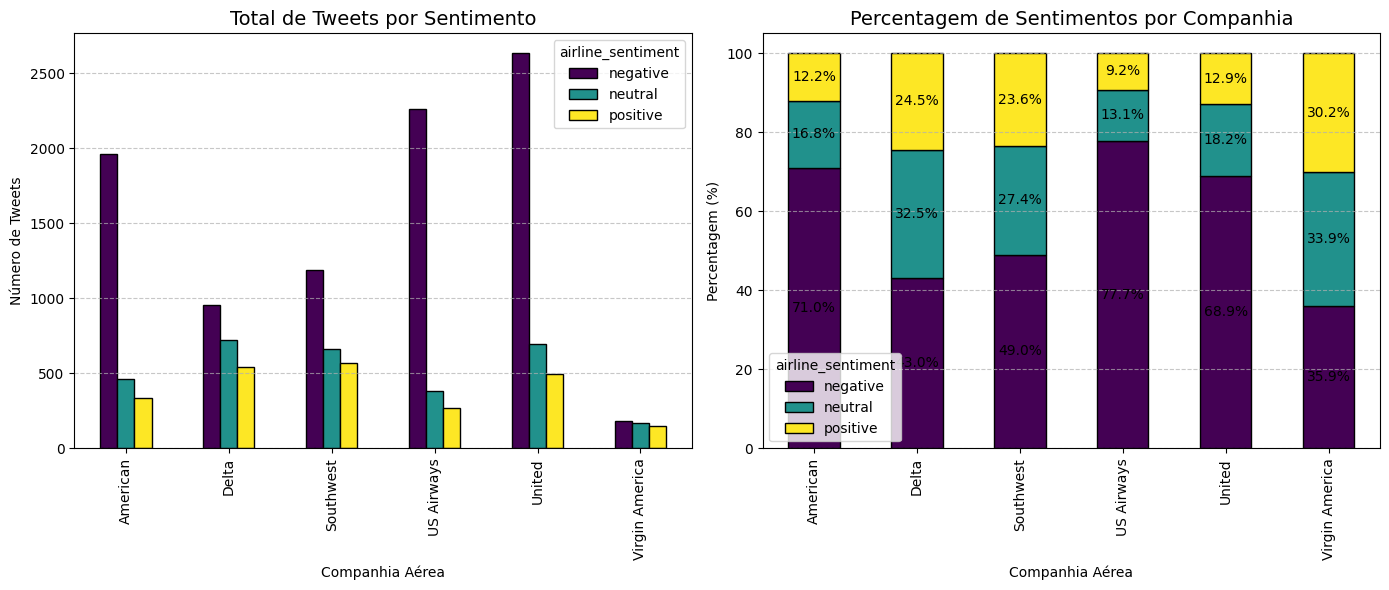

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Gráfico do total de tweets por sentimento
sentimentos_por_airline_total.plot(
    kind='bar',
    ax=axes[0],
    stacked=False,
    colormap='viridis',
    edgecolor='black'
)
axes[0].set_title('Total de Tweets por Sentimento', fontsize=14)
axes[0].set_xlabel('Companhia Aérea')
axes[0].set_ylabel('Número de Tweets')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)



# Gráfico das percentagens de sentimentos por companhia
bars = sentimentos_por_airline_percent.plot(
    kind='bar',
    ax=axes[1],
    stacked=True,
    colormap='viridis',
    edgecolor='black'
)
axes[1].set_title('Percentagem de Sentimentos por Companhia', fontsize=14)
axes[1].set_xlabel('Companhia Aérea')
axes[1].set_ylabel('Percentagem (%)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in bars.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    axes[1].text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


*Relativamente à reputação da 'airline' US Airways, verifica-se que a mesma apresenta maior percentagem de Tweets negativos (77,7%) face a todas as outras companhias. Quanto a comentários positivos a mesma é a que apresenta menor percentagem*

*Em conclusão, a companhia US Airways, é a que apresenta uma pior reputação quando comparada com todas as outras companhias*

## **2ª Questão:** *Can you identify what issues we should focus on to try to improve customer satisfaction?*

In [ ]:
# Calcular a porcentagem de cada tipo de sentimento

percent_sentimentos = df_us_air['airline_sentiment'].value_counts(normalize=True) * 100
percent_sentimentos.round(1)

,proportion
airline_sentiment,
negative,77.7
neutral,13.1
positive,9.2


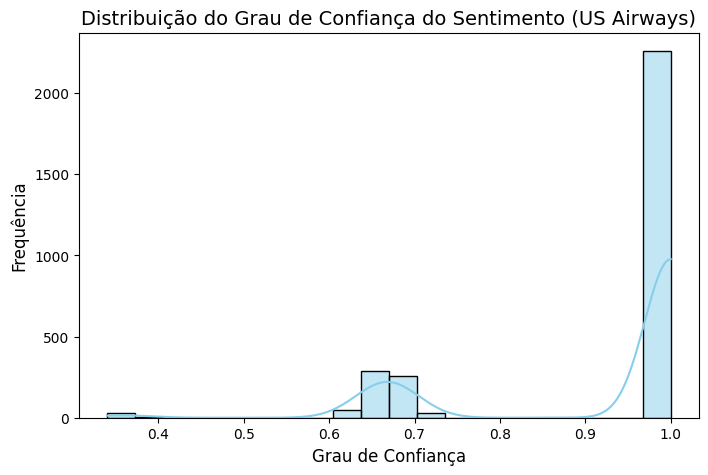

In [ ]:
# Gráfico de distribuição do grau de confiança (todos os sentimentos)

plt.figure(figsize=(8, 5))
sns.histplot(df_us_air['airline_sentiment_confidence'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição do Grau de Confiança do Sentimento (US Airways)', fontsize=14)
plt.xlabel('Grau de Confiança', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [ ]:
# Contagem de cada negative reason

df_us_air_negative = df_us_air[df_us_air['airline_sentiment'] == 'negative']
contagem_negativereason_us_air = df_us_air_negative['negativereason'].value_counts()
contagem_negativereason_us_air

,count
negativereason,
Customer Service Issue,811
Late Flight,453
Can't Tell,246
Cancelled Flight,189
Lost Luggage,154
Flight Attendant Complaints,123
Flight Booking Problems,122
Bad Flight,104
longlines,50


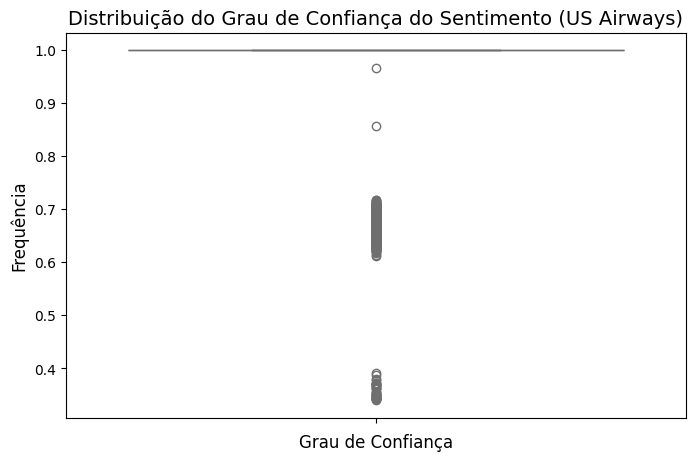

In [ ]:
# Gráfico boxplot para visualizar presença de outliers

plt.figure(figsize=(8, 5))
sns.boxplot(df_us_air['airline_sentiment_confidence'], color='skyblue')
plt.title('Distribuição do Grau de Confiança do Sentimento (US Airways)', fontsize=14)
plt.xlabel('Grau de Confiança', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

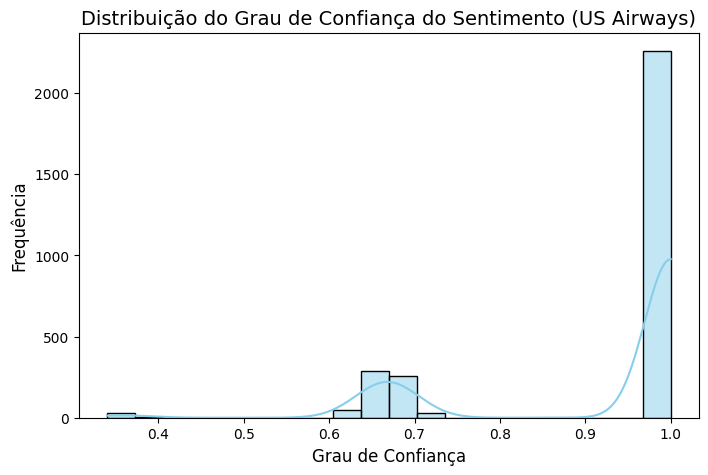

In [ ]:
# Gráfico de distribuição do grau de confiança para sentimento

plt.figure(figsize=(8, 5))
sns.histplot(df_us_air['airline_sentiment_confidence'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição do Grau de Confiança do Sentimento (US Airways)', fontsize=14)
plt.xlabel('Grau de Confiança', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [ ]:
contagem_negativereason_us_air.isna()

,count
negativereason,
Customer Service Issue,False
Late Flight,False
Can't Tell,False
Cancelled Flight,False
Lost Luggage,False
Flight Attendant Complaints,False
Flight Booking Problems,False
Bad Flight,False
longlines,False


In [ ]:
# Frequência das palavras (def)

def get_freq(word: list) -> list:
    words_filtered = [w for w in word if not is_to_remove(w)]
    return nltk.FreqDist(words_filtered)

In [ ]:
# Para a nossa 'airline' = 'US AirWays', quando o 'airline_sentiment' = 'negative',
# a seguir estão as 20 palavras mais comuns nessa generalidade dos Tweets

df_us_air_negative_tweets = ' '.join(df_us_air_negative['text']).lower().split()
get_freq(df_us_air_negative_tweets).most_common(20)

[('flight', 596),
 ('get', 247),
 ('hold', 241),
 ('cancelled', 196),
 ('hours', 156),
 ('service', 154),
 ('us', 151),
 ('customer', 150),
 ('still', 130),
 ('&amp;', 127),
 ('call', 126),
 ('plane', 120),
 ('@americanair', 113),
 ('hour', 111),
 ('late', 106),
 ('help', 102),
 ('time', 101),
 ('need', 99),
 ('delayed', 97),
 ('one', 96)]

In [ ]:
# Gráfico das 20 palavras mais comuns

mais_comuns = get_freq(df_us_air_negative_tweets).most_common(20)
palavras, contagem = zip(*mais_comuns)

plt.figure(figsize=(10, 6))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo)', fontsize=14)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

NameError: name 'get_freq' is not defined

*Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Customer Service Issue', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida*

In [ ]:
df_us_air_customerservice = df_us_air_negative[df_us_air_negative['negativereason'] == "Customer Service Issue" ]
df_us_air_customerservice = ' '.join(df_us_air_customerservice['text']).lower().split()
get_freq(df_us_air_customerservice).most_common(20)

[('hold', 190),
 ('customer', 125),
 ('service', 108),
 ('flight', 103),
 ('call', 97),
 ('get', 94),
 ('phone', 71),
 ('hours', 69),
 ('trying', 55),
 ('help', 54),
 ('hour', 49),
 ('&amp;', 47),
 ('still', 47),
 ('minutes', 45),
 ('one', 43),
 ("can't", 38),
 ('need', 37),
 ('back', 37),
 ('@americanair', 36),
 ('please', 35)]

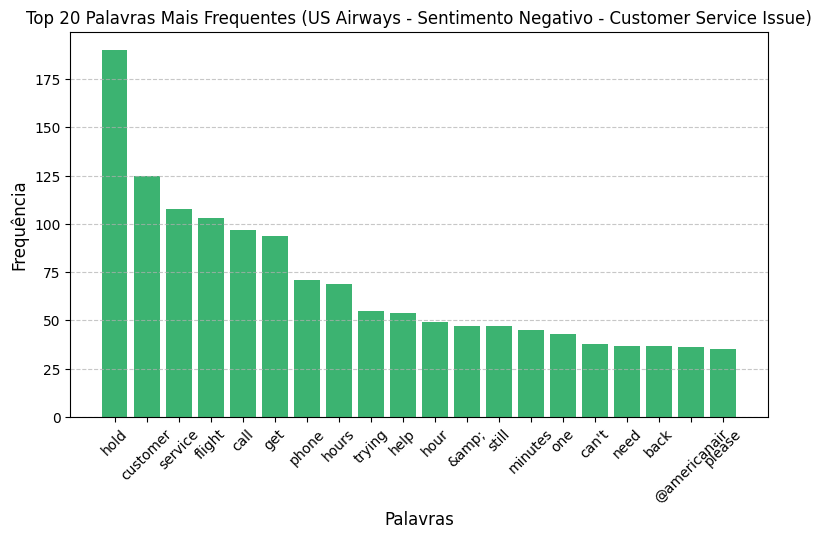

In [ ]:
customer_service_issue = get_freq(df_us_air_customerservice).most_common(20)
palavras, contagem = zip(*customer_service_issue)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Customer Service Issue)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Costumer Service:

As palavras "hold", "call", "phone", "hours", "trying", "help", "minutes" -> indicam eventuais problemas nos contactos telefónicos, falta de capacidade de resposta, grandes tempos de espera, dificuldade de resolução de problemas.

Proposta -> melhorar o atendimento telefónico e o serviço prestado, através:
- implementação de um sistema de "devolução de chamada" pela US Airways após um determinado tempo em vez de deixar os clientes à espera;
- formação dos funcionários tendo em vista a resolução de casos/problemas mais dificeis;
- aumentar o nº de funcionários para as alturas de pico de trabalho (por ex: durante os períodos de férias).


Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Late Flight', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

In [ ]:
df_us_air_lateflight = df_us_air_negative[df_us_air_negative['negativereason'] == "Late Flight" ]
df_us_air_lateflight = ' '.join(df_us_air_lateflight['text']).lower().split()
get_freq(df_us_air_lateflight).most_common(20)

[('flight', 191),
 ('delayed', 75),
 ('plane', 58),
 ('get', 57),
 ('hours', 54),
 ('late', 50),
 ('us', 47),
 ('hour', 38),
 ('delay', 37),
 ('sitting', 37),
 ('still', 34),
 ('waiting', 33),
 ('gate', 33),
 ('time', 27),
 ('due', 26),
 ('miss', 26),
 ('another', 23),
 ('connection', 21),
 ('&amp;', 21),
 ('flights', 20)]

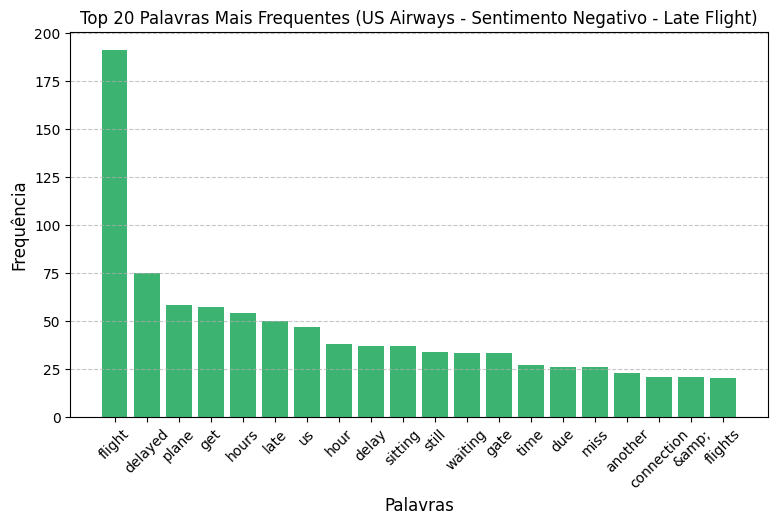

In [ ]:
late_flight = get_freq(df_us_air_lateflight).most_common(20)
palavras, contagem = zip(*late_flight)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Late Flight)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Late Flight:

As palavras "delayed", "hours", "late", "delay", "still", "waiting", "miss", "connection" -> indicam problemas com atrasos de voos, tempos de espera, perda de voos de conexão", entre outros.

Proposta -> melhorar a comunicação e tratamento de atrasos de voos, através:

- desenvolver e implementar um procedimento de aviso imediato ou atempado dos atrasos dos voos (sms, app e através do site da empresa), para que os passageiros não sejam apanhados desprevenidos;
- oferecer medidas compensatórias (vales, descontos, upgrades, etc) aos clientes prejudicados;
- se perdido, remarcar o voo de conexão com upgrade.

Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Can't Tell', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

In [ ]:
df_us_air_canttell = df_us_air_negative[df_us_air_negative['negativereason'] == "Can't Tell" ]
df_us_air_canttell = ' '.join(df_us_air_canttell['text']).lower().split()
get_freq(df_us_air_canttell).most_common(20)

[('flight', 22),
 ('us', 22),
 ('@americanair', 22),
 ('airline', 21),
 ('fly', 18),
 ('get', 18),
 ('never', 16),
 ('worst', 14),
 ('u', 13),
 ('thanks', 12),
 ('go', 12),
 ('take', 11),
 ('like', 11),
 ('time', 11),
 ('guys', 11),
 ('flying', 10),
 ('ever', 10),
 ('experience', 9),
 ('travel', 9),
 ('day', 9)]

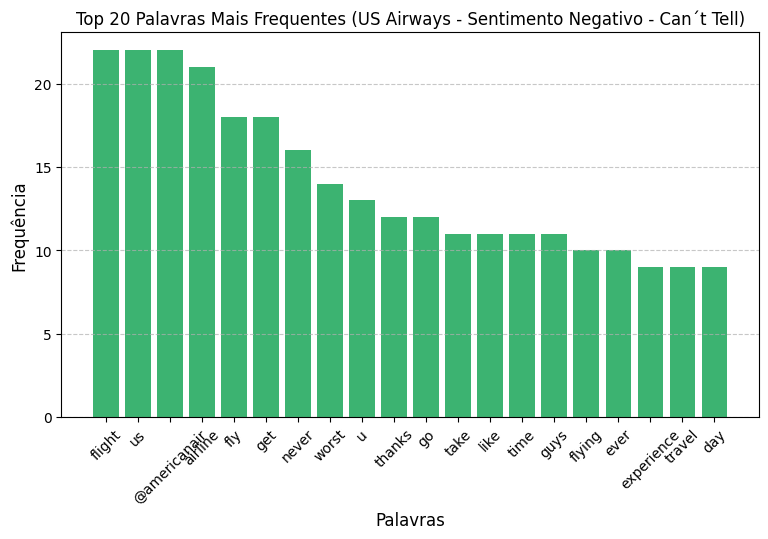

In [ ]:
cant_tell = get_freq(df_us_air_canttell).most_common(20)
palavras, contagem = zip(*cant_tell)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Can´t Tell)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Can´t tell:

As palavras "never", "worst, "thanks", "experience", "travel", "ever" -> indicam graves problemas e péssimas experiências nos serviços prestados.
Parece ainda existir alguma confusão com a Americanair, pois a mesma é referida com frequência

Proposta -> melhorar a experiência do cliente e o serviço prestado, através:
- oferecer medidas compensatórias (vales de troca/descontos, etc) aos clientes prejudicados;
- formação dos funcionários tendo em vista a resolução de casos/problemas mais dificeis com simpatia e eficácia;
- desenvolver um procedimento/plataforma para registo e resolução de reclamações em tempos definidos, dando ao longo do processo, feedback ao cliente;
- Esclarecer, por exemplo, no site da empresa, que a Americanair é outra companhia aérea.

Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Cancelled Flight', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

In [ ]:
df_us_air_cancell_flight = df_us_air_negative[df_us_air_negative['negativereason'] == "Cancelled Flight" ]
df_us_air_cancell_flight = ' '.join(df_us_air_cancell_flight['text']).lower().split()
get_freq(df_us_air_cancell_flight).most_common(20)

[('cancelled', 139),
 ('flight', 127),
 ('flightled', 57),
 ('get', 29),
 ('flights', 25),
 ('flighted', 23),
 ('hold', 19),
 ('&amp;', 18),
 ('us', 14),
 ('flight.', 12),
 ('today', 12),
 ('flightled.', 12),
 ('got', 11),
 ('need', 11),
 ('last', 10),
 ('time', 10),
 ('dca', 10),
 ('due', 10),
 ('hours', 10),
 ("can't", 10)]

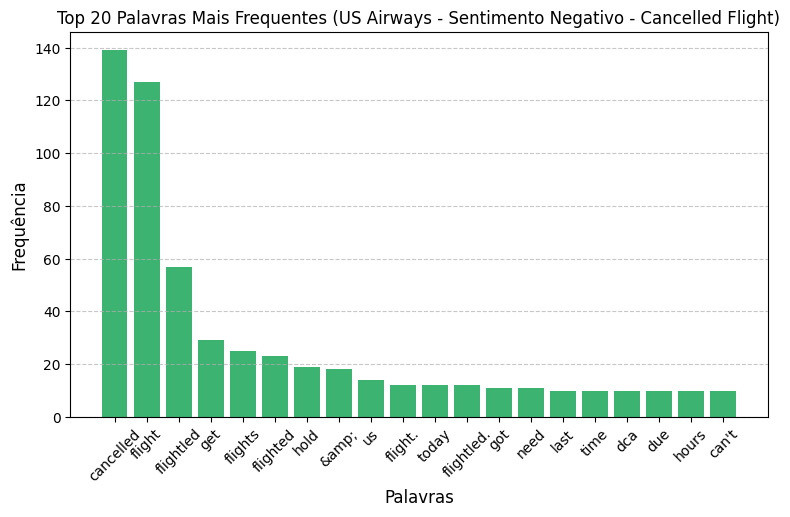

In [ ]:
cancell_flight = get_freq(df_us_air_cancell_flight).most_common(20)
palavras, contagem = zip(*cancell_flight)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Cancelled Flight)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Cancelled Flight

As palavras mais frequentes não dão informação de maior pormenor que a categoria em análise: cancelamento de voos.

Proposta -> melhorar a comunicação e o tratamento do cancelamento de voos, através:

- desenvolver e implementar um procedimento de aviso imediato e atempado do cancelamento dos voos (sms, app e através do site da empresa), para que os passageiros não sejam apanhados desprevenidos e sejam avisados com a maior antecedência possivel;
- oferecer medidas compensatórias (vales, descontos, upgrades, etc) aos clientes prejudicados.


Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Flight Attendant Complaints', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

In [ ]:
df_us_air_attendant_complaints = df_us_air_negative[df_us_air_negative['negativereason'] == "Flight Attendant Complaints" ]
df_us_air_attendant_complaints = ' '.join(df_us_air_attendant_complaints['text']).lower().split()
get_freq(df_us_air_attendant_complaints).most_common(20)

[('flight', 46),
 ('gate', 19),
 ('rude', 12),
 ('@americanair', 11),
 ('staff', 11),
 ('us', 10),
 ('attendant', 10),
 ('people', 10),
 ('agent', 8),
 ('get', 8),
 ('plane', 8),
 ('&amp;', 8),
 ('check', 8),
 ('crew', 8),
 ('attendants', 7),
 ('service', 7),
 ('got', 6),
 ('bag', 6),
 ('like', 5),
 ('passengers', 5)]

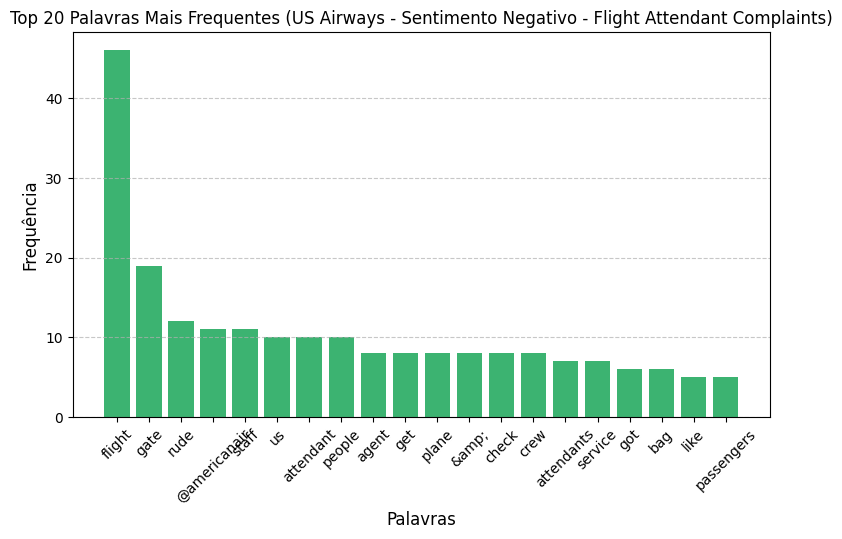

In [ ]:
attendant_complaints = get_freq(df_us_air_attendant_complaints).most_common(20)
palavras, contagem = zip(*attendant_complaints)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Flight Attendant Complaints)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Flight Attendant Complaints

As palavras "rude", "attendant", "agent" -> indicam falta de cuidado e atenção no atendimento dos passageiros.  Parece ainda existir alguma confusão com a Americanair, pois a mesma é referida com frequência.

Proposta -> melhorar o atendimento presencial, através:

- formação dos funcionários tendo em vista aumentar o profissionalismo, a simpatia e a capacidade de resposta;
- desenvolver um procedimento/plataforma para acompanhar e resolver as preocupações dos passageiros, mantendo-os informados ao longo do processo;
- responsabilizar os funcionários com mais reclamações;
- esclarecer, por exemplo, no site da empresa, que a Americanair é outra companhia aérea.

Para as queixas: Lost Luggage e Damaged Luggage, propõe-se:

- melhorar o acompanhamento e a comunicação com os passageiros sobre as malas perdidas;
- desenvolver ou melhorar o procedimento de manuseamento/transporte de malas e bagagens, para evitar danos;
- acelerar o processo de resolução e indemnização por bagagens perdidas;
- oferecer opções claras e rápidas para indemnização ou reparação de bagagens danificadas.

Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Flight Booking Problems', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

In [ ]:
df_us_air_booking_problems = df_us_air_negative[df_us_air_negative['negativereason'] == "Flight Booking Problems" ]
df_us_air_booking_problems = ' '.join(df_us_air_booking_problems['text']).lower().split()
get_freq(df_us_air_booking_problems).most_common(20)

[('flight', 39),
 ('book', 18),
 ('miles', 18),
 ('get', 15),
 ('need', 13),
 ('still', 12),
 ('trying', 11),
 ("can't", 11),
 ('cancelled', 9),
 ('ticket', 9),
 ('booked', 8),
 ('use', 8),
 ('us', 8),
 ('hold', 7),
 ('&amp;', 7),
 ('travel', 7),
 ('dividend', 7),
 ('website', 7),
 ('change', 6),
 ('u', 6)]

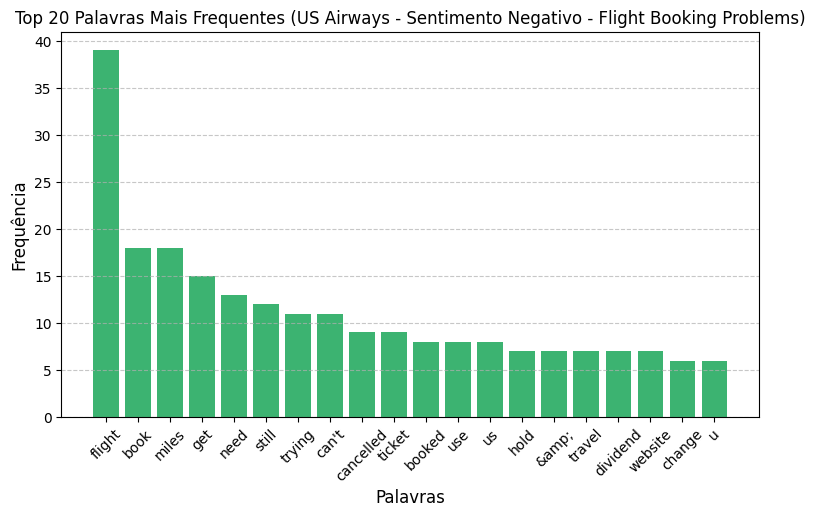

In [ ]:
booking_problems = get_freq(df_us_air_booking_problems).most_common(20)
palavras, contagem = zip(*booking_problems)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Flight Booking Problems)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Flight Booking Problems

As palavras "book", "miles", "trying", "can´t", "ticket", "website" -> indicam dificuldade em reservar as passagens e problemas com milhas.

Proposta -> melhorar o serviço de marcações de viagens, através:

- melhorar a usabilidade do site/app para facilitar o processo de marcação de viagens, reduzir etapas no processo de reserva, oferecer suporte em tempo real (chatbots, atendimento humano);
- clarificar as regras de uso de milhas, mostrar o saldo de forma visível e permitir a simulação de utilização/compra de milhas;
- identificar as mensagens de erro frequentes e esclarecer logo no site numa área de Q&A;
- melhorar o site na pesquisa e filtragem de voos, garantindo que as tarifas e as regras são claras para os utilizadores.

Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Bad Flight', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

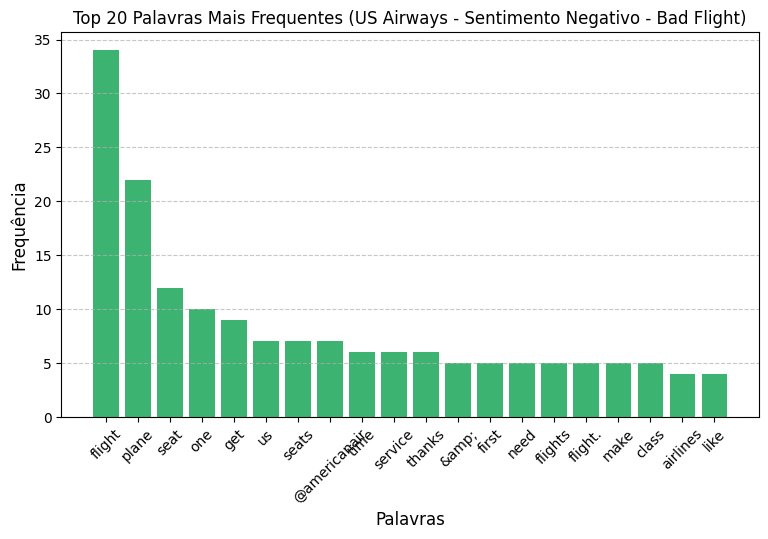

In [ ]:
df_us_air_bad_flight = df_us_air_negative[df_us_air_negative['negativereason'] == "Bad Flight" ]
df_us_air_bad_flight = ' '.join(df_us_air_bad_flight['text']).lower().split()
get_freq(df_us_air_bad_flight).most_common(20)

bad_flight = get_freq(df_us_air_bad_flight).most_common(20)
palavras, contagem = zip(*bad_flight)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Bad Flight)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Bad Flight

As palavras "plane", "seat", "one", "service", "need" -> indicam má experiência de voo e de serviço a bordo.
Parece continuar a existir alguma confusão com a Americanair, pois a mesma é referida com frequência.

Proposta -> Aumentar o conforto e melhorar o serviço de bordo, através:

- Adopção de outro tipo de assentos:mais ergonómicos, confortáveis e com opções de reclinação ajustável
- Disponibilizar aos passageiros uma opção de lugares extra-confortáveis;
- Oferecer WiFi gratuito e um snack e bedida aos passageiros;
- Disponibilizar alguma forma de entretenimento, como por exemplo: filmes, música e/ou jogos;
- Formação das equipas de bordo, de forma a aumentar a simpatia.

Por fim e mais uma vez, esclarecer, por exemplo, no site da empresa, que a Americanair é outra companhia aérea.

Para a nossa 'airline' = 'US AirWays', quando a 'negativereason' = 'Long Lines', as 20 palavras mais comuns nos Tweets são as apresentadas de seguida

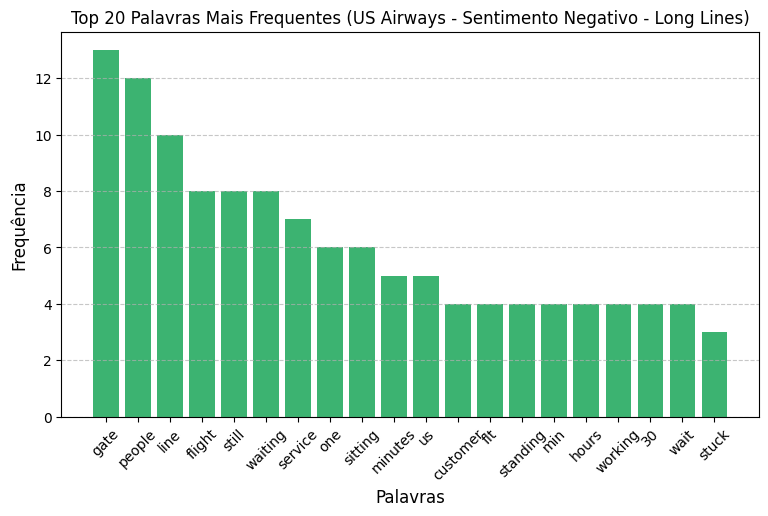

In [ ]:
df_us_air_long_lines = df_us_air_negative[df_us_air_negative['negativereason'] == "longlines" ]
df_us_air_long_lines = ' '.join(df_us_air_long_lines['text']).lower().split()
get_freq(df_us_air_long_lines).most_common(20)

long_lines = get_freq(df_us_air_long_lines).most_common(20)
palavras, contagem = zip(*long_lines)

# Plotar o gráfico
plt.figure(figsize=(9, 5))
plt.bar(palavras, contagem, color='mediumseagreen')
plt.title('Top 20 Palavras Mais Frequentes (US Airways - Sentimento Negativo - Long Lines)', fontsize=12)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Long Lines

As palavras "gate", "people", "line", "still", "waiting", "standing", "stuck" -> indicam problemas nos portões de embarque, superlotação, atrasos, entre outros.

Propostas de melhoria:

- maior número de funcionários nos balcões de embarque, especialmente nas alturas de maior pico;
- monitorização e alertas das filas de embarque, de forma a atuar preventivamente;
- criação de vias rápidas para alguns passageiros.


# **3.2) TASK 02**
## Build a Data Science model to automatically classify the sentiment of future tweets

## Can you predict how confident we can be in this model to use it instead of manual annotation?

## Pre-processing

### Lemmatization
(utilizou-se este método pois ultrapassa diversas limitações do Stemming)

In [ ]:
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(input_text: str):
  return " ".join([lemmatizer.lemmatize(w) for w in word_tokenize(input_text) if not is_to_remove(w)])

In [ ]:
# Código que permite ler todo o tweet da coluna 'text'

pd.set_option('display.max_colwidth', None)

In [ ]:
# Aplicação da lemmatization

df_us_air['text_tratado'] = df_us_air['text'].apply(apply_lemmatization)

df_us_air[['text', 'text_tratado']].head(5)

,text,text_tratado
0,airway better time call flight friday need change worried hold,airway better time call flight friday need change worried hold
1,airway one agent available speak,airway one agent available speak
2,airway admi possible arent following,airway admi possible arent following
3,airway fortunately staff like lynn deedeed actually understand customer service simply nice,airway fortunately staff like lynn deedeed actually understand customer service simply nice
4,airway hung another waste hour time supposed book one way award flight websterite,airway hung another waste hour time supposed book one way award flight websterite


## **1ª Questão:** *Build a Data Science model to automatically classify the sentiment of future tweets*

## Feature engineering | Modeling

In [ ]:
y = df_us_air["airline_sentiment"]

X = df_us_air["text_tratado"]

## TF - IDF

In [ ]:
def model_evaluation(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    print(classification_report(y_true, y_pred))

def apply_model(algorithm, X_train, X_test, y_train, y_test):
    param_grid = {}

    if algorithm == 'logistic_regression':
        param_grid = {'C': [0.05, 0.1, 0.2, 0.3]}
        grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
    elif algorithm == 'naive_bayes':
        grid = MultinomialNB()
    elif algorithm == 'random_forest':
        param_grid = {'n_estimators': [100, 300, 500], 'max_depth': range(2, 7)}
        grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
    elif algorithm == 'xgboost':
        param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
        grid = GridSearchCV(XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=10)
    elif algorithm == 'lightgbm':
        param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
        grid = GridSearchCV(LGBMClassifier(n_estimators=100, verbose=-1, importance_type='gain'), param_grid, cv=10)
    else:
        print('Modelo inválido.')
        return None

    if algorithm != 'naive_bayes':
        grid.fit(X_train, y_train)
        print(f'Best mean cross-validation score: {grid.best_score_}')
        print(f'Best parameters: {grid.best_params_}')
        best_model = grid.best_estimator_
    else:
        grid.fit(X_train, y_train)
        best_model = grid

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    print('Training error')
    model_evaluation(y_train, y_pred_train)
    print('Test error')
    model_evaluation(y_test, y_pred_test)

    return best_model


In [ ]:
# TF-IDF

vec_tf =  TfidfVectorizer()

vec_tf_data = vec_tf.fit_transform(df_us_air['text_tratado'].tolist())
vec_tf_data = vec_tf_data.toarray()

x_tfidf = vec_tf_data

# tfidf_vectorized data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size=0.2, random_state=42, stratify=y)

Best mean cross-validation score: 0.7896995708154506
Best parameters: {'C': 0.3}
Training error
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1810
           1       1.00      0.02      0.04       305
           2       0.89      0.18      0.30       215

    accuracy                           0.80      2330
   macro avg       0.89      0.40      0.41      2330
weighted avg       0.83      0.80      0.72      2330

Test error
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       453
           1       0.00      0.00      0.00        76
           2       1.00      0.15      0.26        54

    accuracy                           0.79       583
   macro avg       0.60      0.38      0.38       583
weighted avg       0.70      0.79      0.71       583



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(C=0.3, max_iter=1000)

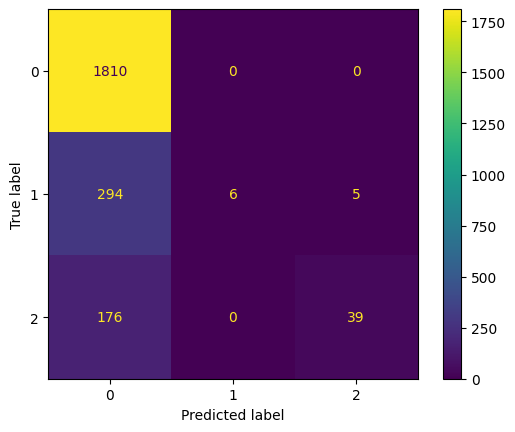

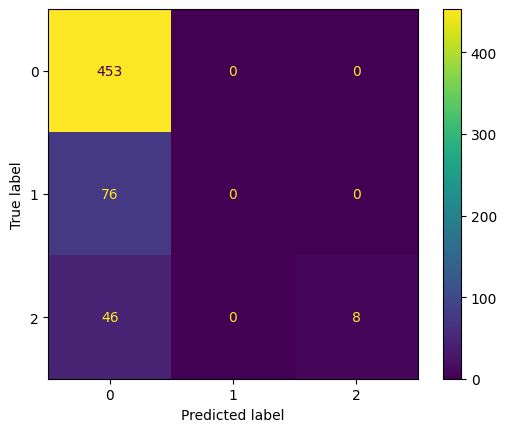

In [ ]:
algorithm = 'logistic_regression'

apply_model(algorithm, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

Training error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1810
           1       1.00      0.03      0.05       305
           2       1.00      0.06      0.11       215

    accuracy                           0.79      2330
   macro avg       0.93      0.36      0.35      2330
weighted avg       0.83      0.79      0.70      2330

Test error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       453
           1       0.00      0.00      0.00        76
           2       1.00      0.04      0.07        54

    accuracy                           0.78       583
   macro avg       0.59      0.35      0.32       583
weighted avg       0.70      0.78      0.69       583



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MultinomialNB()

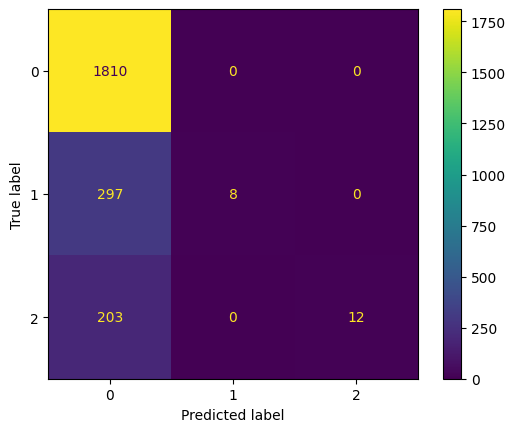

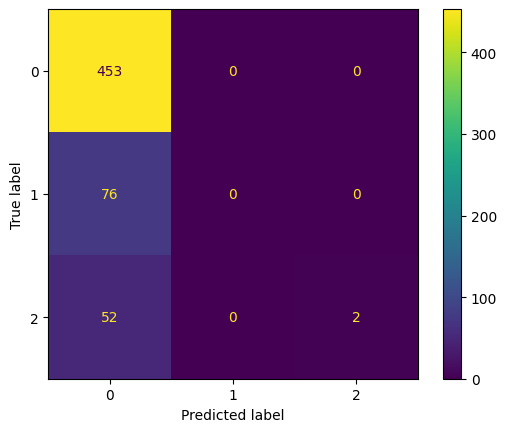

In [ ]:
algorithm = 'naive_bayes'
apply_model(algorithm, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

Best mean cross-validation score: 0.776824034334764
Best parameters: {'max_depth': 2, 'n_estimators': 100}
Training error
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1810
           1       0.00      0.00      0.00       305
           2       0.00      0.00      0.00       215

    accuracy                           0.78      2330
   macro avg       0.26      0.33      0.29      2330
weighted avg       0.60      0.78      0.68      2330

Test error
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       453
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00        54

    accuracy                           0.78       583
   macro avg       0.26      0.33      0.29       583
weighted avg       0.60      0.78      0.68       583



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

RandomForestClassifier(max_depth=2, random_state=42)

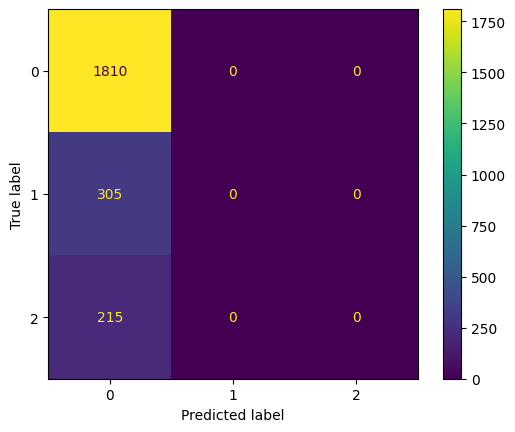

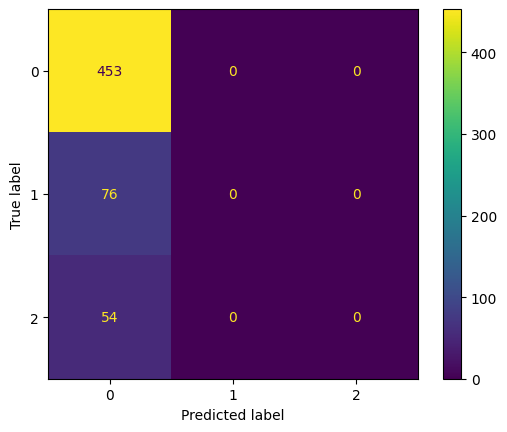

In [ ]:
algorithm = 'random_forest'
apply_model(algorithm, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best mean cross-validation score: 0.811587982832618
Best parameters: {'learning_rate': 0.2, 'max_depth': 4}
Training error
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1810
           1       0.99      0.37      0.54       305
           2       0.91      0.68      0.78       215

    accuracy                           0.89      2330
   macro avg       0.93      0.68      0.75      2330
weighted avg       0.90      0.89      0.87      2330

Test error
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       453
           1       0.54      0.09      0.16        76
           2       0.79      0.43      0.55        54

    accuracy                           0.82       583
   macro avg       0.72      0.50      0.54       583
weighted avg       0.78      0.82      0.77       583



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

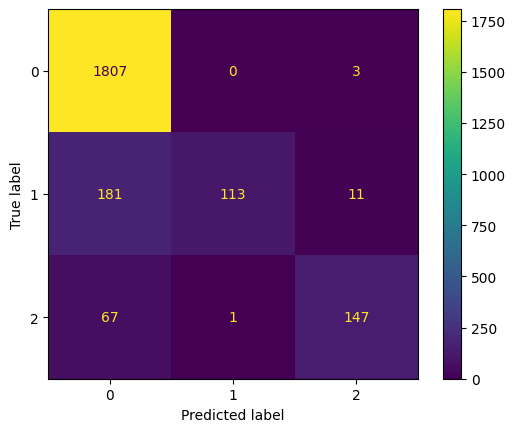

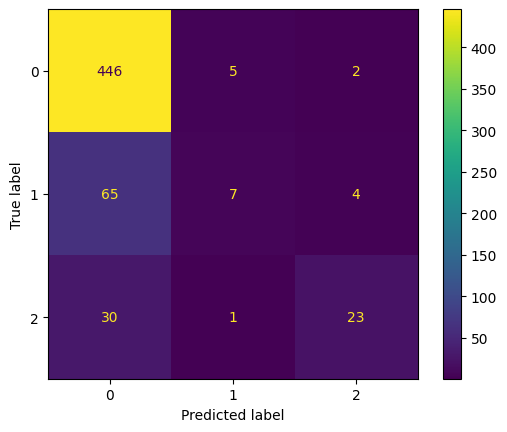

In [ ]:
algorithm = 'xgboost'
apply_model(algorithm, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best mean cross-validation score: 0.8081545064377682
Best parameters: {'learning_rate': 0.1, 'max_depth': 4}
Training error
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1810
           1       0.88      0.16      0.28       305
           2       0.88      0.57      0.69       215

    accuracy                           0.85      2330
   macro avg       0.87      0.58      0.63      2330
weighted avg       0.85      0.85      0.81      2330

Test error
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       453
           1       0.62      0.07      0.12        76
           2       0.83      0.44      0.58        54

    accuracy                           0.82       583
   macro avg       0.76      0.50      0.53       583
weighted avg       0.80      0.82      0.77       583



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(importance_type='gain', max_depth=4, verbose=-1)

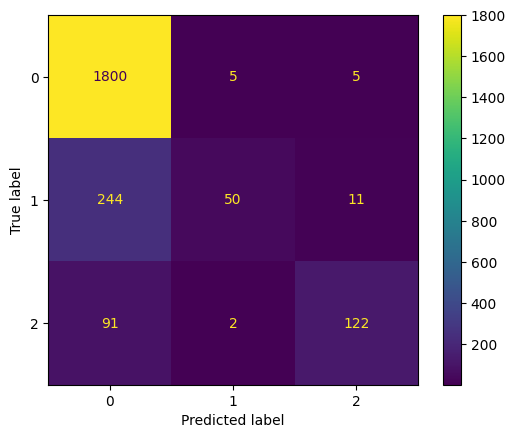

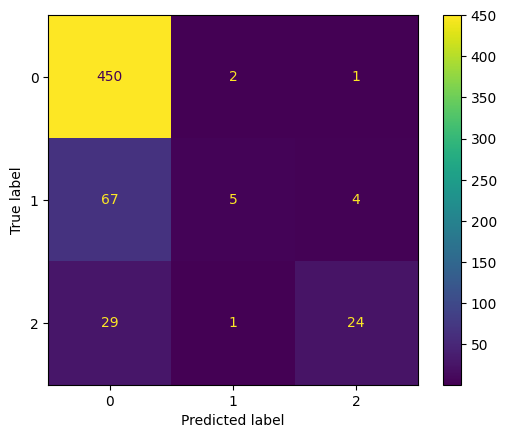

In [ ]:
algorithm = 'lightgbm'
apply_model(algorithm, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)

## Word2vec

In [ ]:
# Necessário passar outra vez porque o naive bayes é diferente neste caso

def model_evaluation(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    print(classification_report(y_true, y_pred))


def apply_model(algorithm, X_train, X_test, y_train, y_test):
    param_grid = {}

    if algorithm == 'logistic_regression':
        param_grid = {'C': [0.05, 0.1, 0.2, 0.3]}
        grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
    elif algorithm == 'naive_bayes':
        grid = GaussianNB()
    elif algorithm == 'random_forest':
        param_grid = {'n_estimators': [100, 300, 500], 'max_depth': range(2, 7)}
        grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
    elif algorithm == 'xgboost':
        param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
        grid = GridSearchCV(XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=10)
    elif algorithm == 'lightgbm':
        param_grid = {'max_depth': np.arange(2, 7), 'learning_rate': [0.05, 0.1, 0.2]}
        grid = GridSearchCV(LGBMClassifier(n_estimators=100, verbose=-1, importance_type='gain'), param_grid, cv=10)
    else:
        print('Modelo inválido.')
        return None

    if algorithm != 'naive_bayes':
        grid.fit(X_train, y_train)
        print(f'Best mean cross-validation score: {grid.best_score_}')
        print(f'Best parameters: {grid.best_params_}')
        best_model = grid.best_estimator_
    else:
        grid.fit(X_train, y_train)
        best_model = grid

    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    print('Training error')
    model_evaluation(y_train, y_pred_train)
    print('Test error')
    model_evaluation(y_test, y_pred_test)

    return best_model


In [ ]:
# Se for para usar o Word2Vec, teríamos de adaptar a variável model conforme descrita abaixo
# model = Word2Vec(df_us_air['text_tratado'].apply(str.split).tolist(), min_count=1)

sentences = [text.split() for text in df_us_air['text_tratado']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(words, model):
    words = [word for word in words if word in model.wv]
    return np.mean(model.wv[words], axis=0) if words else np.zeros(model.vector_size)

X_word2vec = np.array([document_vector(text.split(), word2vec_model) for text in df_us_air['text_tratado']])
y = df_us_air['airline_sentiment']


# Normalizar os vetores
scaler = StandardScaler()
X_word2vec = scaler.fit_transform(X_word2vec)

# Dividir os dados
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_word2vec, y, test_size=0.2, random_state=42, stratify=y)

Best mean cross-validation score: 0.7854077253218884
Best parameters: {'C': 0.2}
Training error
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1810
           1       0.42      0.03      0.05       305
           2       0.72      0.13      0.22       215

    accuracy                           0.79      2330
   macro avg       0.64      0.38      0.38      2330
weighted avg       0.74      0.79      0.71      2330

Test error
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       453
           1       0.33      0.03      0.05        76
           2       0.71      0.09      0.16        54

    accuracy                           0.78       583
   macro avg       0.61      0.37      0.36       583
weighted avg       0.72      0.78      0.70       583



LogisticRegression(C=0.2, max_iter=1000)

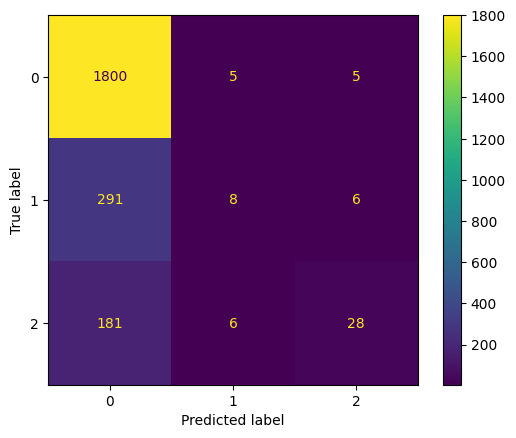

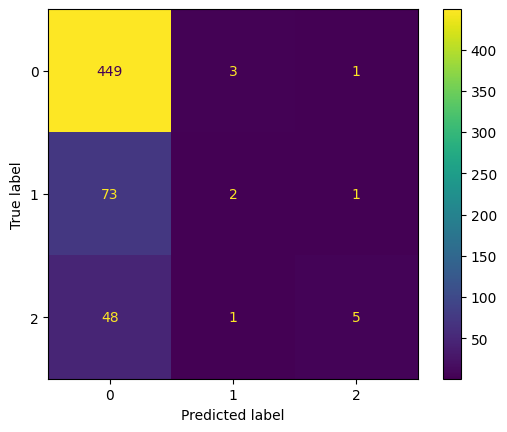

In [ ]:
algorithm = 'logistic_regression'
apply_model(algorithm, X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

Training error
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1810
           1       0.16      0.15      0.15       305
           2       0.13      0.23      0.17       215

    accuracy                           0.61      2330
   macro avg       0.36      0.37      0.36      2330
weighted avg       0.65      0.61      0.63      2330

Test error
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       453
           1       0.19      0.17      0.18        76
           2       0.12      0.19      0.14        54

    accuracy                           0.63       583
   macro avg       0.37      0.37      0.37       583
weighted avg       0.67      0.63      0.65       583



GaussianNB()

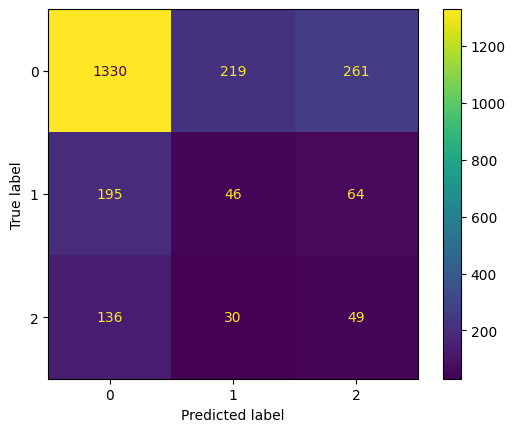

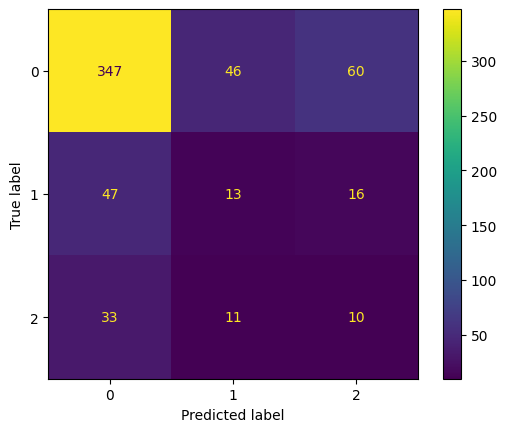

In [ ]:
algorithm = 'naive_bayes'
apply_model(algorithm, X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

Best mean cross-validation score: 0.7811158798283262
Best parameters: {'max_depth': 2, 'n_estimators': 100}
Training error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1810
           1       0.00      0.00      0.00       305
           2       0.75      0.07      0.13       215

    accuracy                           0.78      2330
   macro avg       0.51      0.36      0.34      2330
weighted avg       0.68      0.78      0.69      2330

Test error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       453
           1       0.00      0.00      0.00        76
           2       0.60      0.06      0.10        54

    accuracy                           0.78       583
   macro avg       0.46      0.35      0.33       583
weighted avg       0.66      0.78      0.69       583



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

RandomForestClassifier(max_depth=2, random_state=42)

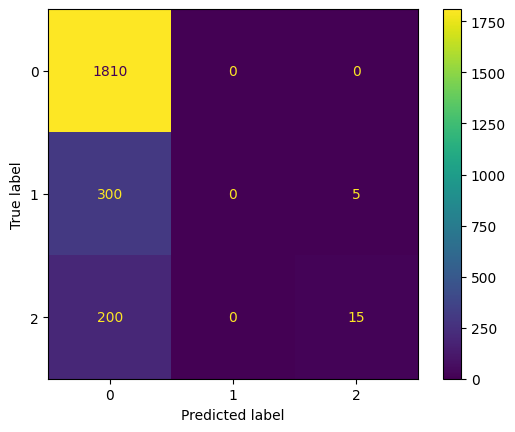

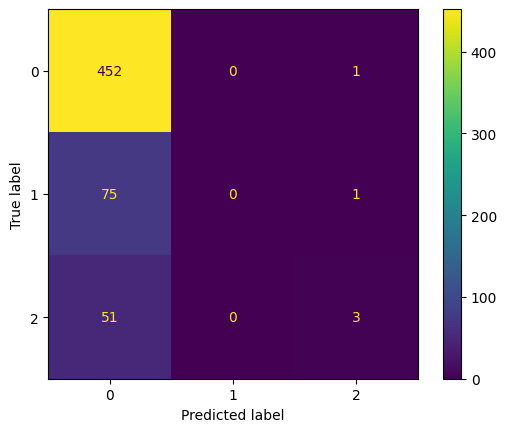

In [ ]:
algorithm = 'random_forest'
apply_model(algorithm, X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best mean cross-validation score: 0.7811158798283262
Best parameters: {'learning_rate': 0.05, 'max_depth': 2}
Training error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1810
           1       0.83      0.02      0.03       305
           2       0.89      0.07      0.14       215

    accuracy                           0.79      2330
   macro avg       0.84      0.36      0.35      2330
weighted avg       0.80      0.79      0.70      2330

Test error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       453
           1       1.00      0.01      0.03        76
           2       0.60      0.06      0.10        54

    accuracy                           0.78       583
   macro avg       0.79      0.35      0.33       583
weighted avg       0.79      0.78      0.69       583



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

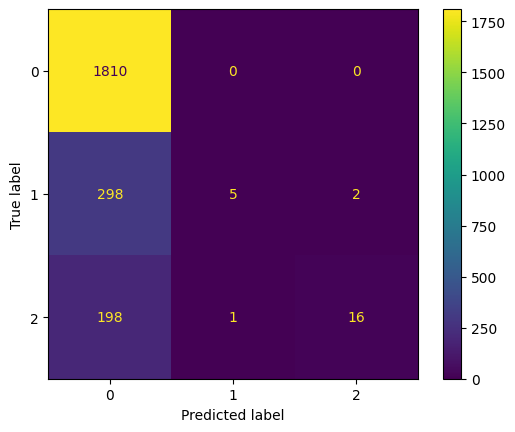

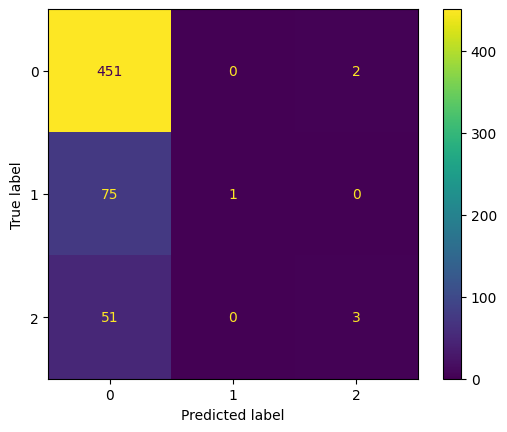

In [ ]:
algorithm = 'xgboost'
apply_model(algorithm, X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best mean cross-validation score: 0.7806866952789699
Best parameters: {'learning_rate': 0.05, 'max_depth': 2}
Training error
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1810
           1       0.83      0.03      0.06       305
           2       0.83      0.07      0.13       215

    accuracy                           0.79      2330
   macro avg       0.82      0.37      0.36      2330
weighted avg       0.80      0.79      0.70      2330

Test error
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       453
           1       1.00      0.01      0.03        76
           2       1.00      0.06      0.11        54

    accuracy                           0.78       583
   macro avg       0.93      0.36      0.34       583
weighted avg       0.83      0.78      0.70       583



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(importance_type='gain', learning_rate=0.05, max_depth=2,
               verbose=-1)

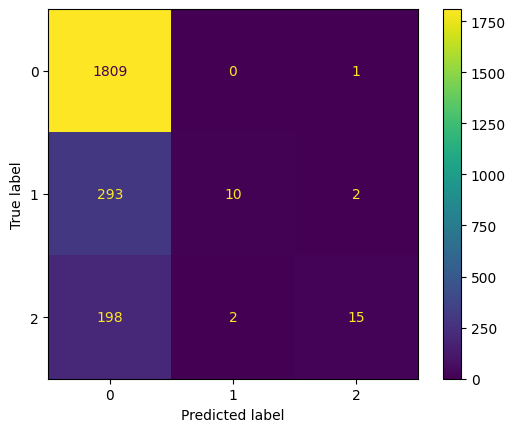

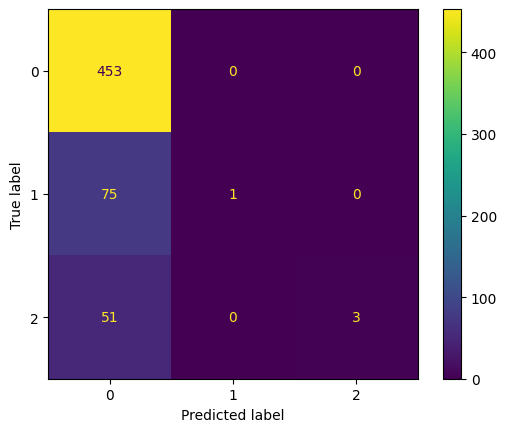

In [ ]:
algorithm = 'lightgbm'
apply_model(algorithm, X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v)

# **Conclusão**

Considerando os dados disponíveis, verifica-se primeiramente que existe um desbalanceamento entre classes, pois a maioria dos tweets são de sentimento negativo.
Analisando os resultados no cômputo geral para as 3 classes de sentimento, verifica-se que relativamente à:

- Classe 0 (Negativa):
--	Ambos os modelos são muito fortes na classe 0, com recall altíssimo (~1.00) e F1-Score entre 0.88–0.90;
--	O TF-IDF tem uma ligeira vantagem em Naive Bayes, enquanto nos restantes algoritmos são quase equivalentes.
- Classe 1 (Neutra):
--	Desempenho muito fraco no geral;
--	O Word2Vec melhora levemente o recall para Naive Bayes (de 0.00 para 0.17);
--	Mesmo com algoritmos potentes como XGBoost e LightGBM, o recall fica abaixo de 0.10.
-  Classe 2 (Positiva):
--	O TF-IDF tem desempenho significativamente melhor, principalmente com:
o	XGBoost (recall 0.43 / F1 0.55);
o	LightGBM (recall 0.44 / F1 0.58).
--	O Word2Vec tem dificuldade em capturar esta classe: recall entre 0.06–0.19, F1 muito baixo.

Em resumo, se analisarmos a previsão das 3 classes, o TF-IDF + LightGBM será a melhor escolha, pois tem um excelente desempenho na classe 0 (recall 0.99, F1 0.90), tem melhor equilíbrio entre classes 1 e 2 (F1: 0.12 e 0.58), superando Word2Ve e é geralmente superior ao XGBoost, com menos overfitting. Para além disso, é de referir que o modelo LightGBM tem um tempo de execução bastante rápido, que ronda os 40 segundos.

Agora, analisando ou identificando corretamente os sentimentos negativos, que no nosso entendimento é o mais importante, pois permite a companhia resolver os problemas mais rapidamente, reduzindo a insatisfação e a má imagem e melhorando a reputação.
Assim, da análise dos resultados, verifica-se o seguinte:

- Todos os modelos têm excelente desempenho na classe 0, com recall perto ou igual a 1.00.

-	O TF-IDF, com XGBoost ou LightGBM tem os melhores F1-scores (0.90) para esta classe.

-	Naive Bayes com Word2Vec é o único com recall mais baixo (0.77), indicando menor capacidade de detetar corretamente as mensagens negativas neste caso.



Relativamente a overfitting, não há indícios sérios de overfitting em nenhum dos modelos para a classe 0. Em alguns casos (ex: XGBoost com TF-IDF), há uma pequena diferença entre treino e teste, mas no geral, os modelos estão bem generalizados e confiáveis.

Em resumo, se analisarmos a previsão para a classe negativa, o TF-IDF com o LightGBM, será a melhor escolha.
Concluindo e relativamente à confiança no modelo, podemos verificar que o recall é  bastante alto (≈1.00), que indica que praticamente todos os comentários negativos são identificados corretamente; o F1-Score alto (0.90) confirma que a precisão também é elevada e a accuracy em geral também é alta  (~78–79%), reforçando a estabilidade.
